# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

---

## Zestaw zadań 7: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [3]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    n = np.random.poisson(intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    return pd.DataFrame({"X" : x, "Y" : y})

### Zadanie 1: Import i przygotowanie danych (9 pkt)

Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z trzech dołączonych do niego plików. Następnie, wykorzystując funkcję `geopandas.GeoDataFrame()` przygotuj na ich podstawie trzy tablice z danymi:

1) Tablica zawierająca wybrane dane dotyczące województw:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierającąa wybrane dane dotyczące <u>miast</u>:
    - "Nazwa" - nazwy miast
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierająca wybrane dane dotyczące <u>Wisły</u> i <u>Odry</u>:
    - "Nazwa" - nazwy rzek
    - "geometry" - geometria obiektów


Wyświetl przygotowane tablice.

Uwaga 1: Pliki zawierają więcej danych niż opisane wyżej tablice. W wynikowych tablicach nie powinny znaleźć się zbędne dane.
    
Uwaga 2: Poprawny import polskich nazw może wymagać ustawienia odpowiedniej wartości argumentu `encoding` podczas wywoływania funkcji `geopandas.read_file()`.

In [4]:
# Województwa
wojewodztwaF = gpd.read_file("Wojewodztwa.zip")
wojewodztwa = gpd.GeoDataFrame({"Nazwa" : wojewodztwaF['JPT_NAZWA_'], "geometry" : wojewodztwaF['geometry']})

In [5]:
# Miasta
miejscowosciF = gpd.read_file("Miejscowosci.zip")
miastaF = miejscowosciF[miejscowosciF.rodzaj == "miasto"].reset_index()
miasta = gpd.GeoDataFrame({"Nazwa" : miastaF['nazwaGlown'], "geometry" : miastaF['geometry']})

In [6]:
# Rzeki
rzekiF = gpd.read_file("Rzeki.zip")
rzekiF_Odra_Wisla = rzekiF[(rzekiF.NAZ_RZEKI == "Wisła") | (rzekiF.NAZ_RZEKI == "Odra")]
rzeki = gpd.GeoDataFrame({"Nazwa" : rzekiF_Odra_Wisla['NAZ_RZEKI'], "geometry" : rzekiF_Odra_Wisla['geometry']})

### Zadanie 2: Transformacja między odwzorowaniami kartograficznymi (3 pkt)

Wczytywane dane są zapisane z wykorzystaniem różnych odwzorowań kartograficznych. Przed rozpoczęciem analizy należy je ze sobą uzgodnić.

Korzystając z własności obiektów GeoDataFrame `geopandas.GeoDataFrame.crs` sprawdzć odwzorowanie kartograficzne, w którym zapisane są poszczególne tablice. Jeżeli odwzorowanie jest inne niż epsg:2180 dokonaj jego konwersji z wykorzystaniem funkcji `geopandas.GeoDataFrame.to_crs()`.

In [7]:
wojewodztwa = wojewodztwa.to_crs('epsg:2180')
rzeki = rzeki.to_crs('epsg:2180')
print(wojewodztwa.crs)
print(miasta.crs)
print(rzeki.crs)

epsg:2180
epsg:2180
epsg:2180


### Zadanie 3: Wizualizacja danych wejściowych (3 pkt)

Korzystając z funkcji pakietu matplotlib oraz funkcji `geopandas.GeoDataFrame.plot()` zwizualizuj komplet przygotowanych danych. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

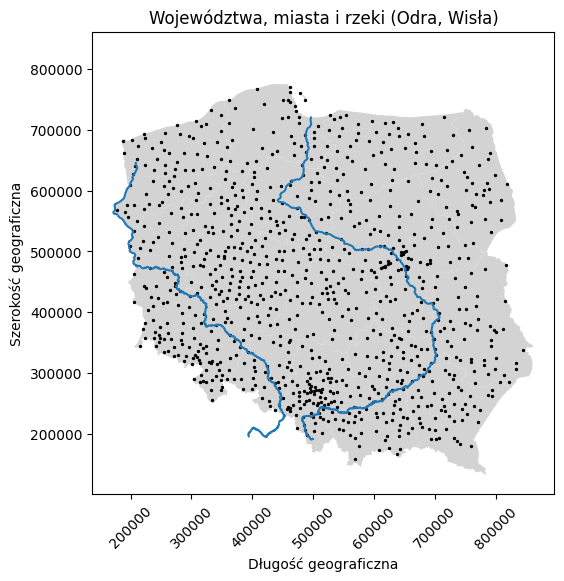

In [8]:
fig, axes = plt.subplots(1, 1, figsize = (6,6))

wojewodztwa.plot(ax = axes, facecolor = "lightgray")
miasta.plot(ax = axes, markersize = 2, color = "black")
rzeki.plot(ax = axes)

axes.set_title("Województwa, miasta i rzeki (Odra, Wisła)", fontsize = 12);
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel("Długość geograficzna")            
axes.set_ylabel("Szerokość geograficzna")
axes.axis('square');

### Zadanie 4: Mierzenie długości, pola powierzchni i odległości (10 pkt)

#### a) Długość Wisły
Korzystając z własności `geopandas.GeoSeries.length` zmierz długość Wisły. Wyświetl odpowiedź podając długość rzeki w kilometrach.

In [9]:
dlWisly = rzeki[rzeki.Nazwa == "Wisła"].length.item() / 1000
print("Długość Wisły wynosi {} km".format(dlWisly))

Długość Wisły wynosi 1019.7577991167121 km


#### b) Pola powierzchni województw
Korzystając z własności `geopandas.GeoSeries.area` zmierz powierzchnię województw. Zapisz wyniki do tablicy w kolumnie o nazwie "Pole". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie jakie jest pole powierzchni Polski (podaj pole w kilometrach kwadratowych) oraz przygotowania wizualiacji, na której kolor przypisany województwom jest powiązany z ich powierzchnią. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [10]:
# Obliczenia
wojewodztwa["Pole"] = wojewodztwa.area
polePolski = wojewodztwa["Pole"].sum() / 1e6
print("Pole powierzchni Polski wynosi {} km2".format(polePolski))

Pole powierzchni Polski wynosi 312506.6445773843 km2


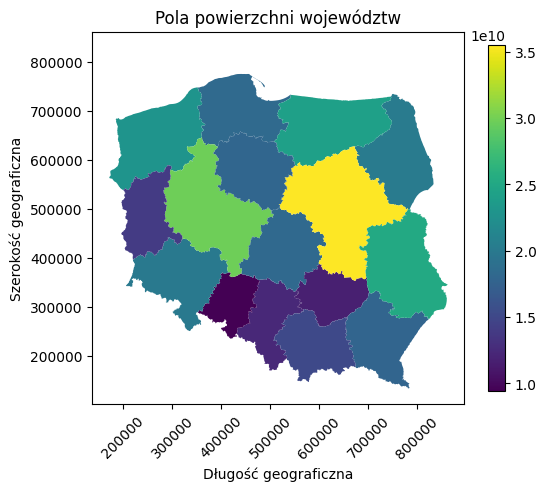

In [11]:
# Wizualizacja
fig, axes = plt.subplots(1, 1, figsize = (6,6))

wojewodztwa.plot(ax = axes, column = "Pole", legend = True, legend_kwds={'shrink': 0.75})
axes.set_title("Pola powierzchni województw", fontsize = 12)
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel("Długość geograficzna")            
axes.set_ylabel("Szerokość geograficzna")
axes.axis('square');

#### c) Odległość miast od Krakowa
Korzystając z funkcji `geopandas.GeoSeries.distance()` zmierz odległość poszczególnych miast od Krakowa. Zapisz wyniki do tablicy w kolumnie o nazwie "Odległość od Krakowa". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie w jakiej odległości od Krakowa leży Poznań (odpowiedź podaj w kilometrach) oraz przygotowania wizualiacji, na której kolor przypisany miastom jest powiązany z ich odległością od Krakowa. 

Wizualizacja powinna zawierać:
- kontury województw, bez wypełnienia,
- lokalicaje miast.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [12]:
# Obliczenia
coordKrakow = miasta[miasta.Nazwa == "Kraków"].geometry.item()
miasta["Odległość od Krakowa"] = miasta.distance(coordKrakow)
distKrPoz = miasta[miasta.Nazwa == "Poznań"]["Odległość od Krakowa"].item()
print("Poznań leży {} km od Krakowa".format(distKrPoz / 1000))

Poznań leży 334.60495145299524 km od Krakowa


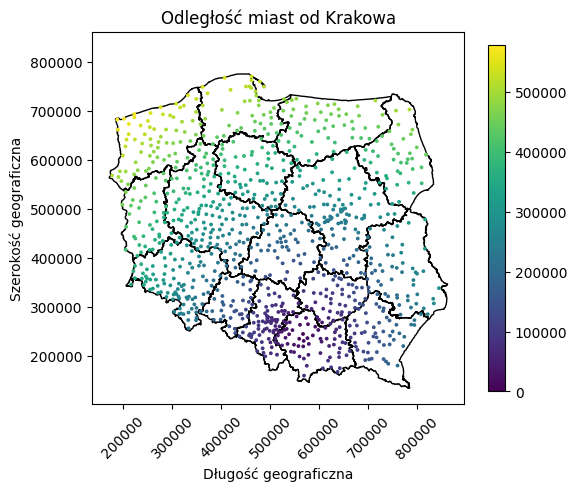

In [13]:
# Wizualizacja
fig, axes = plt.subplots(1, 1, figsize = (6,6))

wojewodztwa.plot(ax = axes, facecolor = "none")
miasta.plot(ax = axes, column = "Odległość od Krakowa", markersize = 3, legend = True, legend_kwds={'shrink': 0.75})
axes.set_title("Odległość miast od Krakowa", fontsize = 12)
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel("Długość geograficzna")            
axes.set_ylabel("Szerokość geograficzna")
axes.axis('square');

### Zadanie 5: Wykorzystanie prostych operacji geometrycznych (12 pkt)

#### a) Miasta blisko Wisły

Korzystając z funkcji `geopandas.GeoSeries.buffer()` oraz `geopandas.GeoSeries.within()` sprawdź, które miast leżą bliżej niż 20 km od Wisły. Zapisz wyniki do tablicy w kolumnie o nazwie "Blisko Wisły". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie ile miast leży bliżej niż 20 km od Wisły oraz przygotowania wizualiacji, na której oznaczony zostanie obszar znajdujący się bliżej niż 20 km od Wisły, a znajdujące się w tym obszarze miasta będą wyróżnione kolorem względem pozostałych miast.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od położenia w obrębie lub poza analizowanym obszarem.
- rzeki wypełnione jednolitym kolorem,
- oznaczenie obszaru leżącego nie dalej niż 20 km od Wisły.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [14]:
# Obliczenia
buff = rzeki[rzeki.Nazwa == "Wisła"].geometry.buffer(20000)
miasta["Blisko Wisły"] = miasta.geometry.within(buff.item())
print("{} miast leży bliżej niż 20 km od Wisły".format(sum(miasta["Blisko Wisły"])))

148 miast leży bliżej niż 20 km od Wisły


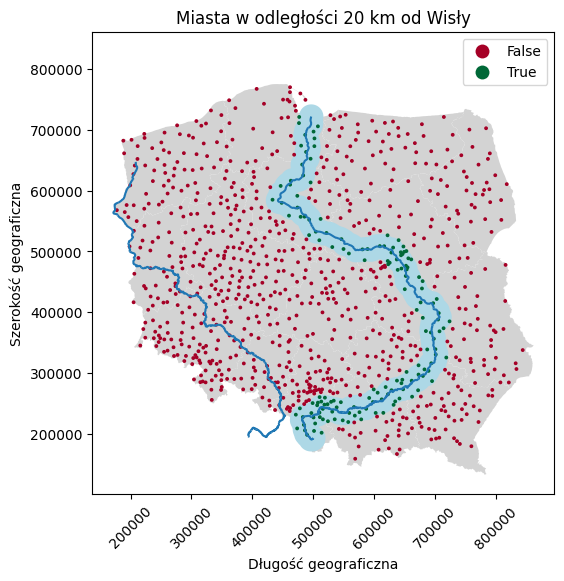

In [15]:
# Wizualizacja
fig, axes = plt.subplots(1, 1, figsize = (6,6))

wojewodztwa.plot(ax = axes, facecolor = "lightgray")
buff.plot(ax = axes, color = "lightblue")
miasta.plot(ax = axes, column = "Blisko Wisły", markersize = 3, cmap = "RdYlGn", legend = True)
rzeki.plot(ax = axes)

axes.set_title("Miasta w odległości 20 km od Wisły", fontsize = 12)
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel("Długość geograficzna")            
axes.set_ylabel("Szerokość geograficzna")
axes.axis('square');

#### b) Województwa, przez które przepływa Odra
Korzystając z funkcji `geopandas.GeoSeries.intersects()` sprawdź, przez które województwa przepływa Odra. Zapisz wyniki do tablicy w kolumnie o nazwie "Odra w obrębie". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie przez ile województw przepływa Odra oraz przygotowania wizualiacji, na której województwa przez które przepływa Odra będą wyróżnione kolorem względem pozostałych województw.

Wizualizacja powinna zawierać:
- województwa, wwypełnione jednym z dwóch wybranych kolorów w zależności od spełnienia warunku,
- miasta, wypełnione jednolitym kolorem,
- rzeki wypełnione jednolitym kolorem.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [16]:
# Obliczenia
Odra = rzeki[rzeki.Nazwa == "Odra"].geometry.item()
wojewodztwa["Odra w obrębie"] = wojewodztwa.intersects(Odra)
print("Odra przepływa przez {} województw".format(sum(wojewodztwa["Odra w obrębie"])))

Odra przepływa przez 5 województw


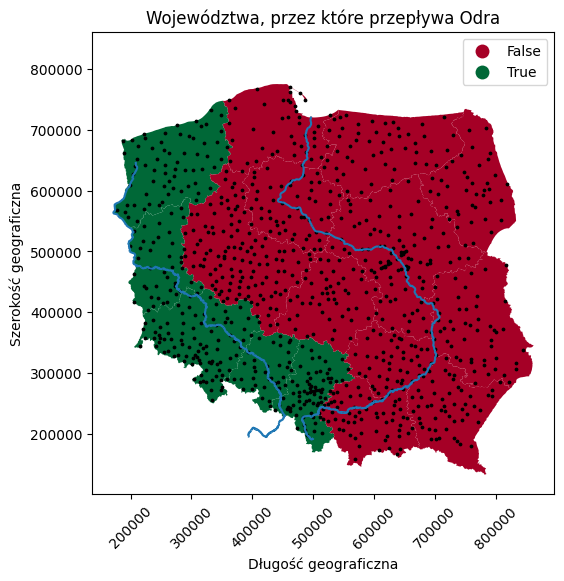

In [17]:
# Wizualizacja
fig, axes = plt.subplots(1, 1, figsize = (6,6))

wojewodztwa.plot(ax = axes, column = "Odra w obrębie", cmap = "RdYlGn", legend = True)
miasta.plot(ax = axes, markersize = 3, color = "black")
rzeki.plot(ax = axes)

axes.set_title("Województwa, przez które przepływa Odra", fontsize = 12)
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel("Długość geograficzna")            
axes.set_ylabel("Szerokość geograficzna")
axes.axis('square');

### Zadanie 6: Generowanie procesu punktowego w obrębie poligonu (13 pkt)

Przygotuj funkcję `homogeneous_poisson_on_polygon()`, która będzie wykorzystywała funkcję `homogeneous_poisson_on_rectangle()` przygotową w ramach pierwszego zestawu zadań oraz możliwości pakietu geopandas do generowania jednorodnego rozkładu Poissona w obrębie dowolnego poligonu.

Następnie wykorzystaj funkcję do wygenerowania rozkładu punktów o intensywności $10^{-8} pkt/m^2$ na obszarze województwa mazowieckiego i zwizualizuj wyniki. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

Przydatne funkcje i własności:
- `geopandas.GeoSeries.bounds`
- `geopandas.GeoSeries.from_xy()`
- `geopandas.GeoSeries.set_crs()`
- `geopandas.GeoSeries.within()`

#### a) Przygotowanie funkcji

In [18]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty.
    
    Returns
    -------
    points: GeoDataFrame
        Tablica zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    minx, miny, maxx, maxy = polygon.bounds
    df = homogeneous_poisson_on_rectangle(intensity, [minx, maxx], [miny, maxy])
    gpf = gpd.GeoSeries.from_xy(df["X"], df["Y"], crs = "epsg:2180")
    return gpf[gpf.within(polygon)]

#### b) Wygenerowanie procesu

In [19]:
mazowieckie = wojewodztwa[wojewodztwa.Nazwa == "mazowieckie"].geometry
gpf = homogeneous_poisson_on_polygon(1e-8, mazowieckie.item())

#### c) Wizualizacja

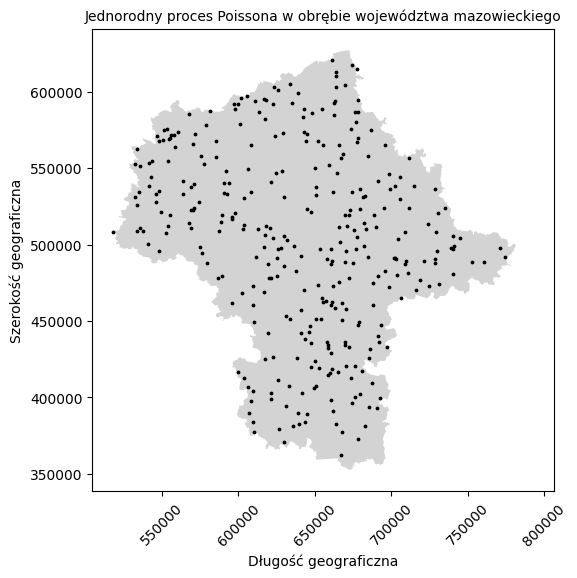

In [20]:
fig, axes = plt.subplots(1, 1, figsize = (6,6))

mazowieckie.plot(ax = axes, color = "lightgray")
gpf.plot(ax = axes, markersize = 3, color = "black")

axes.set_title("Jednorodny proces Poissona w obrębie województwa mazowieckiego", fontsize = 10)
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel("Długość geograficzna")            
axes.set_ylabel("Szerokość geograficzna")
axes.axis('square');